# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 30

Group Members:
- Aland Mulia Pratama (13522124)
- Rizqika Mulia Pratama (13522126)
- Christian Justin Hendrawan (13522135)
- Auralea Alvinia Syaikha (13522148)

## Import Libraries

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 45)

## Import Dataset

In [263]:
# Read train dataset
basic_df = pd.read_csv('../dataset/train/basic_features_train.csv')
label_df = pd.read_csv('../dataset/train/labels_train.csv')
flow_df = pd.read_csv('../dataset/train/flow_features_train.csv')
time_df = pd.read_csv('../dataset/train/time_features_train.csv')
content_df = pd.read_csv('../dataset/train/content_features_train.csv')
additional_df = pd.read_csv('../dataset/train/additional_features_train.csv')
modified_df = pd.read_csv('../dataset/train/UNSW-NB15_features-modified.csv')


In [264]:
# Merge all of the data into one dataframe
train_df = pd.DataFrame()
train_df['id'] = basic_df['id']
train_df = pd.merge(train_df, basic_df, on='id')
train_df = pd.merge(train_df, flow_df, on='id')
train_df = pd.merge(train_df, time_df, on='id')
train_df = pd.merge(train_df, content_df, on='id')
train_df = pd.merge(train_df, additional_df, on='id')
train_df = pd.merge(train_df, label_df, on='id')

In [265]:
train_df = train_df.drop(['id'], axis=1)

In [266]:
# Show the first 20 rows of the dataframe
train_df.head(20)

state       dur   sbytes    dbytes   sttl   dttl  sloss  dloss service  \
0    FIN  2.736664  13350.0  548216.0   31.0   29.0   21.0  197.0       -   
1    INT  0.000009    114.0       0.0  254.0    0.0    0.0    0.0     dns   
2    FIN  5.788526   6102.0    3892.0  254.0  252.0   13.0   13.0       -   
3    FIN  3.849634  25160.0       NaN   31.0   29.0   38.0  390.0       -   
4    CON  0.001052    130.0     162.0    NaN   29.0    0.0    0.0     dns   
5    INT  0.000005    114.0       0.0  254.0    0.0    0.0    0.0     dns   
6    INT  0.000008    114.0       0.0  254.0    0.0    0.0    0.0     dns   
7    FIN  1.465899  28660.0       NaN  254.0  252.0   14.0    3.0       -   
8    FIN  0.034137      NaN    3380.0   31.0   29.0   18.0    8.0    smtp   
9    FIN  0.022733   2958.0   33044.0   31.0   29.0    7.0   18.0       -   
10   INT  1.008568    360.0       0.0  254.0    0.0    0.0    0.0       -   
11   INT  0.000010      NaN       0.0  254.0    0.0    0.0    0.0     NaN   
12   FIN  0.935165    774.0     642.0  254.0  252.0    NaN    3.0     NaN   
13   FIN  0.628938    672.0     354.0  254.0  252.0    2.0    1.0       -   
14   INT  0.000008    114.0       0.0  254.0    0.0    0.0    0.0     dns   
15   CON  0.001721    536.0     304.0   31.0   29.0    NaN    0.0       -   
16   FIN  0.295378  20964.0     354.0  254.0  252.0    8.0    1.0       -   
17   FIN  1.281219    814.0    4216.0   62.0    NaN    2.0    3.0    http   
18   FIN  0.227764    534.0     268.0  254.0  252.0    2.0    1.0       -   
19   FIN  0.755426    862.0     268.0  254.0  252.0    2.0    1.0    http   

           sload         dload  spkts  dpkts proto         sjit          djit  \
0   3.885899e+04  1.598925e+06  232.0  438.0   tcp  4449.110313   3234.831566   
1   5.066666e+07  0.000000e+00    2.0    0.0   udp     0.000000      0.000000   
2   8.199669e+03  5.221364e+03   36.0   34.0   tcp  8561.040438    249.950547   
3   5.216912e+04  2.272451e+06  448.0  858.0   tcp  4053.086020   2918.730804   
4   4.942966e+05  6.159696e+05    2.0    2.0   udp     0.000000      0.000000   
5   9.120000e+07  0.000000e+00    2.0    0.0   udp          NaN      0.000000   
6   5.700000e+07  0.000000e+00    2.0    0.0   udp     0.000000      0.000000   
7   1.518140e+05  4.169455e+03   34.0   16.0   tcp          NaN    125.553867   
8   8.617278e+06  7.733544e+05   52.0   42.0   tcp    42.179459           NaN   
9   1.019487e+06  1.139630e+07   48.0   50.0   tcp    25.926994     26.607684   
10  2.141650e+03  0.000000e+00    4.0    0.0   st2   475.433625      0.000000   
11  8.000000e+07  0.000000e+00    2.0    0.0  unas     0.000000      0.000000   
12  6.150786e+03  5.038683e+03   14.0   12.0   tcp  4331.012656    114.148000   
13  7.695512e+03  3.943155e+03   10.0    8.0   tcp  3950.174903    143.374063   
14  5.700000e+07  0.000000e+00    2.0    0.0   udp     0.000000      0.000000   
15  1.868681e+06  1.059849e+06    4.0    4.0   udp     0.623433      0.300760   
16  5.420038e+05  8.396021e+03   22.0    8.0   tcp  1072.161080     63.188059   
17           NaN  2.369618e+04   10.0   10.0   tcp  8195.231860  10703.679750   
18  1.689468e+04  7.867793e+03   10.0    NaN   tcp  1159.036911     54.850969   
19  8.217880e+03  2.372171e+03   10.0    6.0   tcp  4770.390222    236.562828   

        sinpkt      dinpkt    tcprtt    synack    ackdat   swin   dwin  \
0    11.845558    6.261361       NaN  0.000444  0.000114  255.0  255.0   
1     0.009000    0.000000  0.000000  0.000000       NaN    0.0    0.0   
2   165.386453  172.345750  0.158826  0.057902  0.100924  255.0  255.0   
3     8.669644    4.496707  0.000558  0.000448       NaN  255.0  255.0   
4     0.008000    0.007000  0.000000  0.000000  0.000000    0.0    0.0   
5     0.005000    0.000000  0.000000  0.000000  0.000000    0.0    0.0   
6     0.008000    0.000000  0.000000  0.000000  0.000000    0.0    0.0   
7    43.671909         NaN  0.140336  0.090759  0.049577  255.0  255.0   
8     0.689755   

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [267]:
# 1. Basic statistics and info

print("Dataset Shape:", train_df.shape)
print("\nFeature Names:")
print(train_df.columns.tolist())
print("\nBasic Statistics:")
train_df.describe()

Dataset Shape: (175341, 43)

Feature Names:
['state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'proto', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']

Basic Statistics:


dur        sbytes        dbytes           sttl  \
count  166619.000000  1.667800e+05  1.664720e+05  166516.000000   
mean        1.359299  8.734079e+03  1.493589e+04     179.521944   
std         6.485386  1.712289e+05  1.430150e+05     102.957427   
min         0.000000  2.800000e+01  0.000000e+00       0.000000   
25%         0.000008  1.140000e+02  0.000000e+00      62.000000   
50%         0.001548  4.500000e+02  1.640000e+02     254.000000   
75%         0.667311  1.418000e+03  1.096000e+03     254.000000   
max        59.999989  1.296523e+07  1.465555e+07     255.000000   

                dttl          sloss          dloss         sload  \
count  166687.000000  166547.000000  166363.000000  1.665550e+05   
mean       79.584179       4.904790       6.971688  7.342186e+07   
std       110.494848      64.867849      51.801936  1.884564e+08   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%         0.000000       0.000000       0.000000  1.303032e+04   
50%        29.000000       0.000000       0.000000  8.714544e+05   
75%       252.000000       3.000000       2.000000  8.888889e+07   
max       254.000000    4803.000000    5484.000000  5.988000e+09   

              dload          spkts          dpkts          sjit  \
count  1.665040e+05  166687.000000  166655.000000  1.666030e+05   
mean   6.718596e+05      20.266134      18.923015  4.993982e+03   
std    2.422879e+06     136.433895     110.898133  4.506783e+04   
min    0.000000e+00       1.000000       0.000000  0.000000e+00   
25%    0.000000e+00       2.000000       0.000000  0.000000e+00   
50%    1.426630e+03       2.000000       2.000000  0.000000e+00   
75%    2.807410e+04      12.000000      10.000000  2.511184e+03   
max    2.242273e+07    9616.000000   10974.000000  1.460480e+06   

                djit         sinpkt         dinpkt         tcprtt  \
count  166495.000000  166634.000000  166607.000000  166505.000000   
mean      604.891720     987.360974      87.763617       0.041331   
std      4082.439167    7246.462797     987.040024       0.079428   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.008000       0.000000       0.000000   
50%         0.000000       0.284723       0.006000       0.000000   
75%       114.753348      55.205806      50.933127       0.065151   
max    289388.269700   84371.496000   56716.824000       2.518893   

              synack         ackdat           swin           dwin  \
count  166605.000000  166746.000000  166601.000000  166562.000000   
mean        0.021042       0.020402     116.184837     114.956407   
std         0.043560       0.040619     126.994753     126.880855   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.023235       0.038951     255.000000     255.000000   
max         2.100352       1.520884     255.000000     255.000000   

              stcpb         dtcpb          smean          dmean  \
count  1.666690e+05  1.665380e+05  166553.000000  166486.000000   
mean   9.696210e+08  9.693479e+08     136.803840     124.161041   
std    1.355284e+09  1.354113e+09     204.753194     258.265755   
min    0.000000e+00  0.000000e+00      28.000000       0.000000   
25%    0.000000e+00  0.000000e+00      57.000000       0.000000   
50%    0.000000e+00  0.000000e+00      73.000000      44.000000   
75%    1.915654e+09  1.912673e+09     100.000000      89.000000   
max    4.294959e+09  4.294882e+09    1504.000000    1458.000000   

         trans_depth  response_body_len  is_sm_ips_ports   ct_state_ttl  \
count  166556.000000       1.665500e+05    166595.000000  166706.000000   
mean        0.106193       2.157133e+03         0.015799       1.303852   
std         0.794070       5.509898e+04         0.124697       0.954779   
min         0.000000       0.000000e+00         

In [268]:
# 2. Check missing values
missing_values = train_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
proto                8826
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           

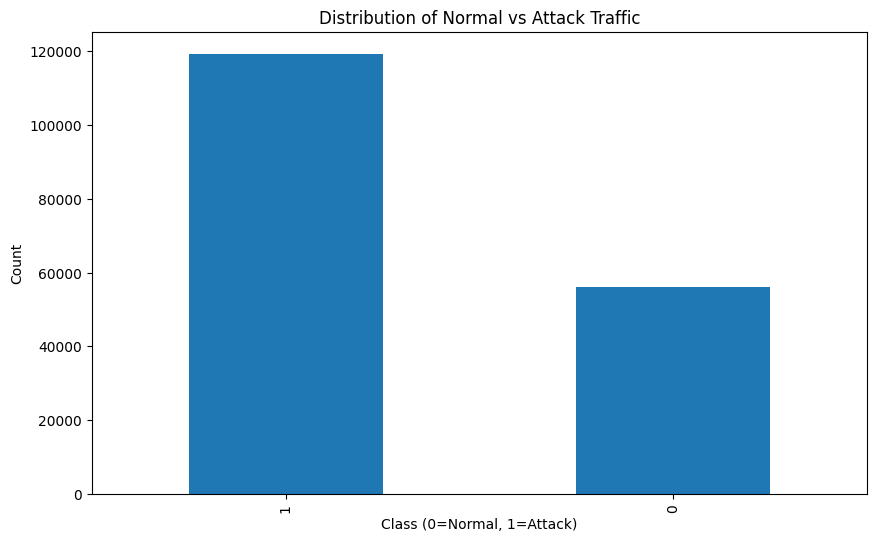

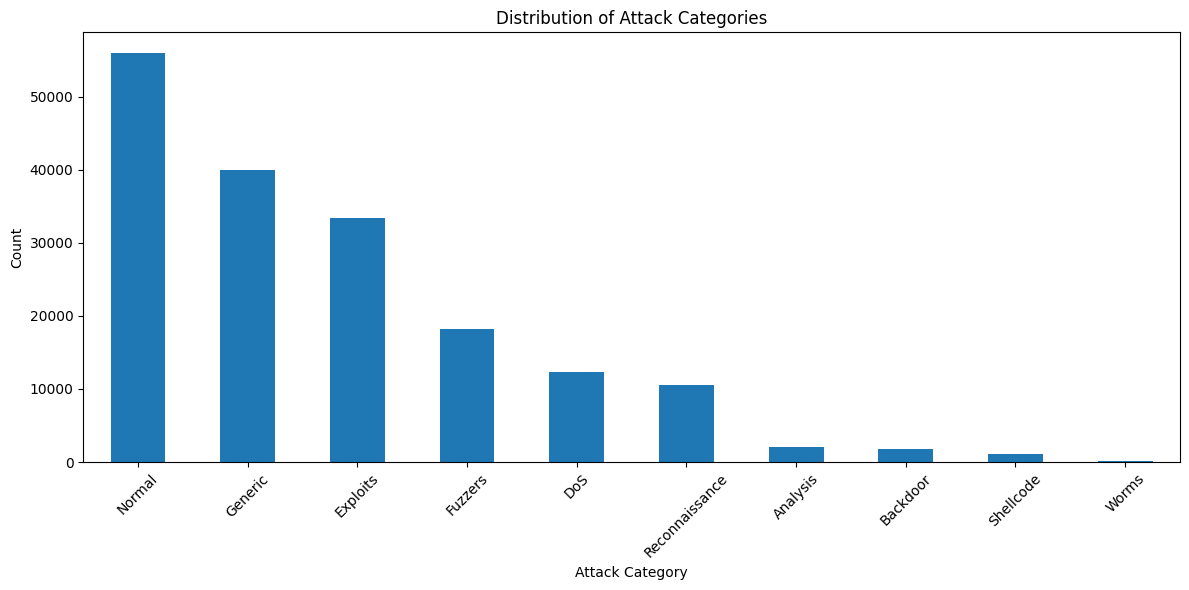

In [269]:
# 3. Feature distributions and class balance
plt.figure(figsize=(10, 6))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Normal vs Attack Traffic')
plt.xlabel('Class (0=Normal, 1=Attack)')
plt.ylabel('Count')
plt.show()

# Attack category distribution
plt.figure(figsize=(12, 6))
train_df['attack_cat'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

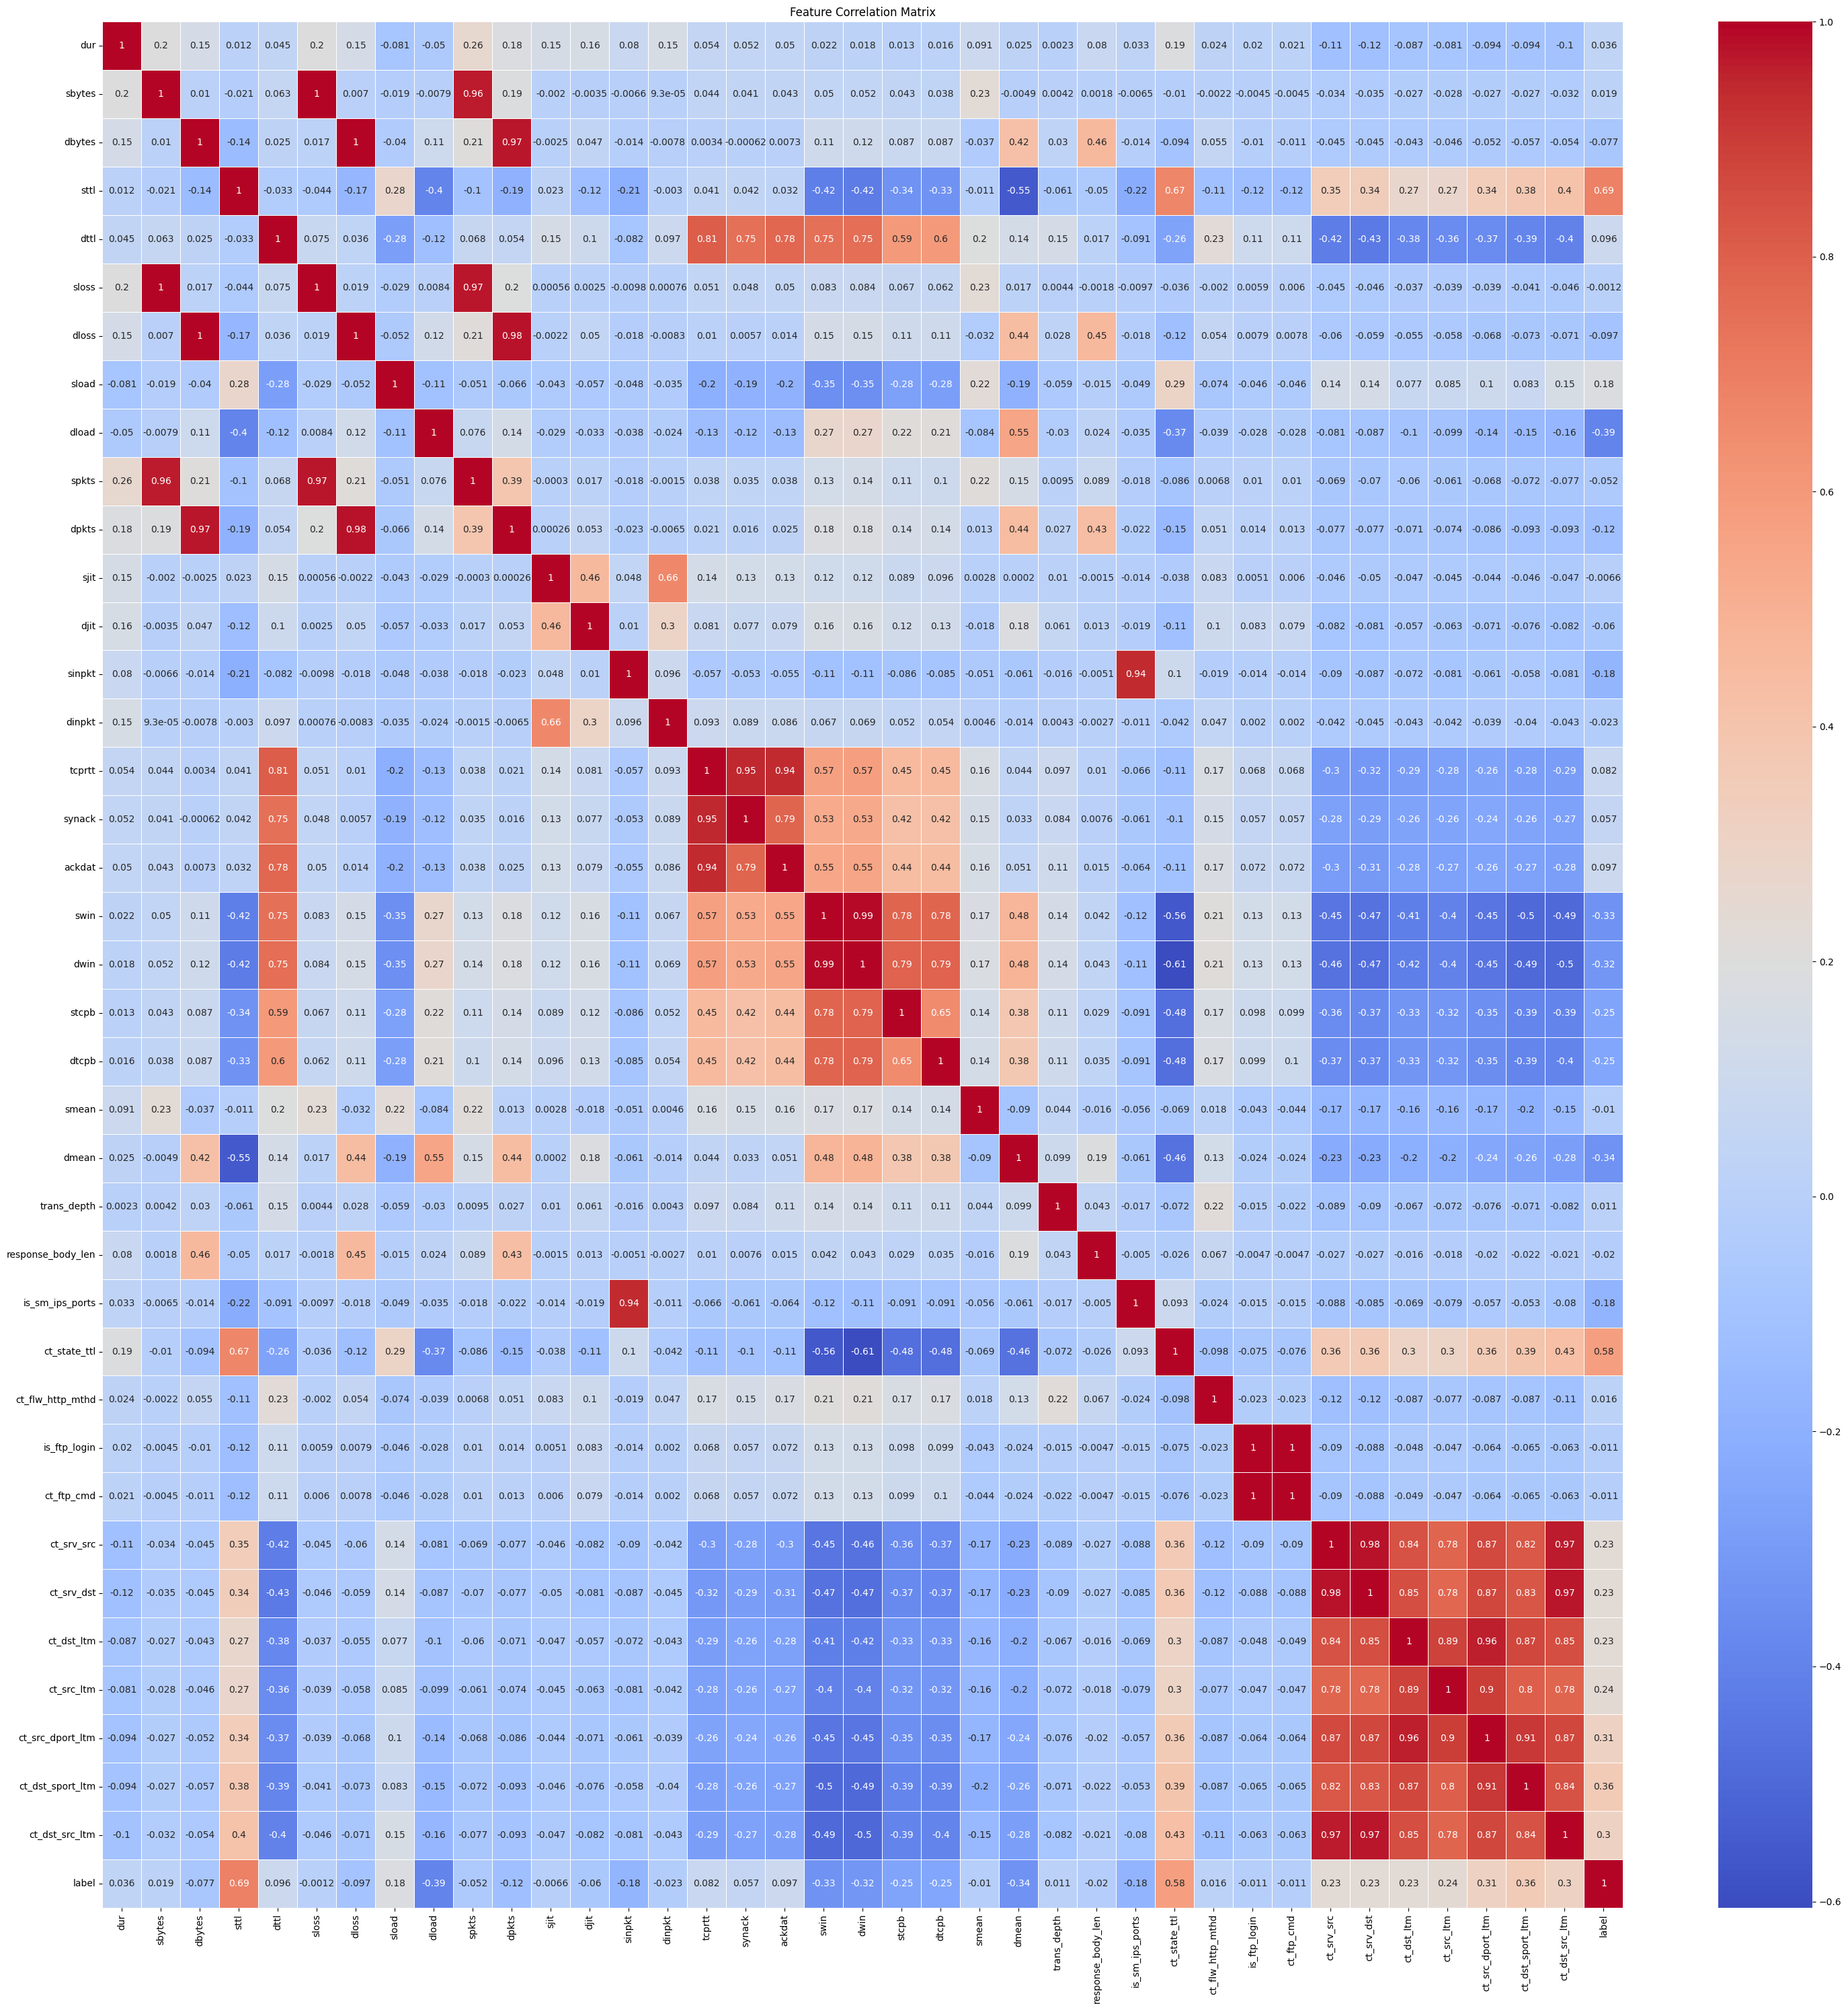

In [270]:
# 4. Correlation analysis
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

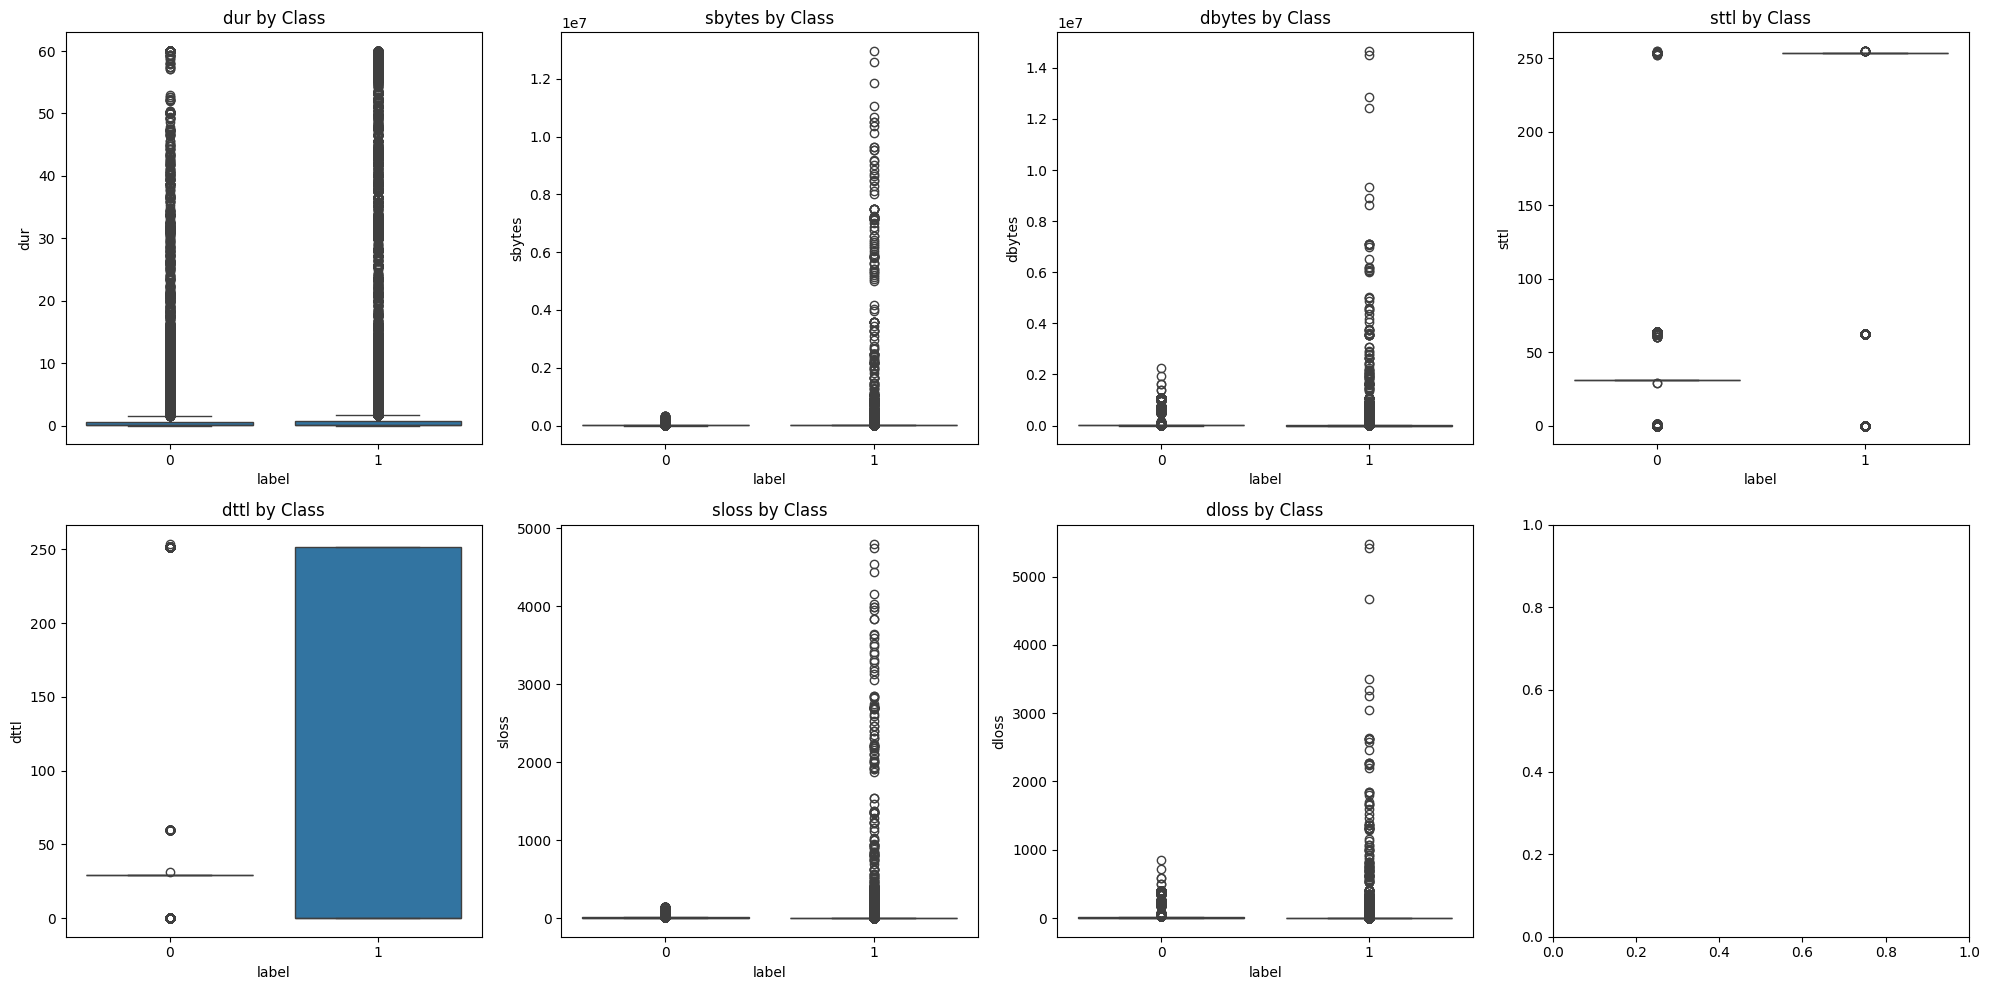

In [271]:
# 5. Box plots for key numeric features
key_features = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    sns.boxplot(data=train_df, x='label', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Class')

plt.tight_layout()
plt.show()

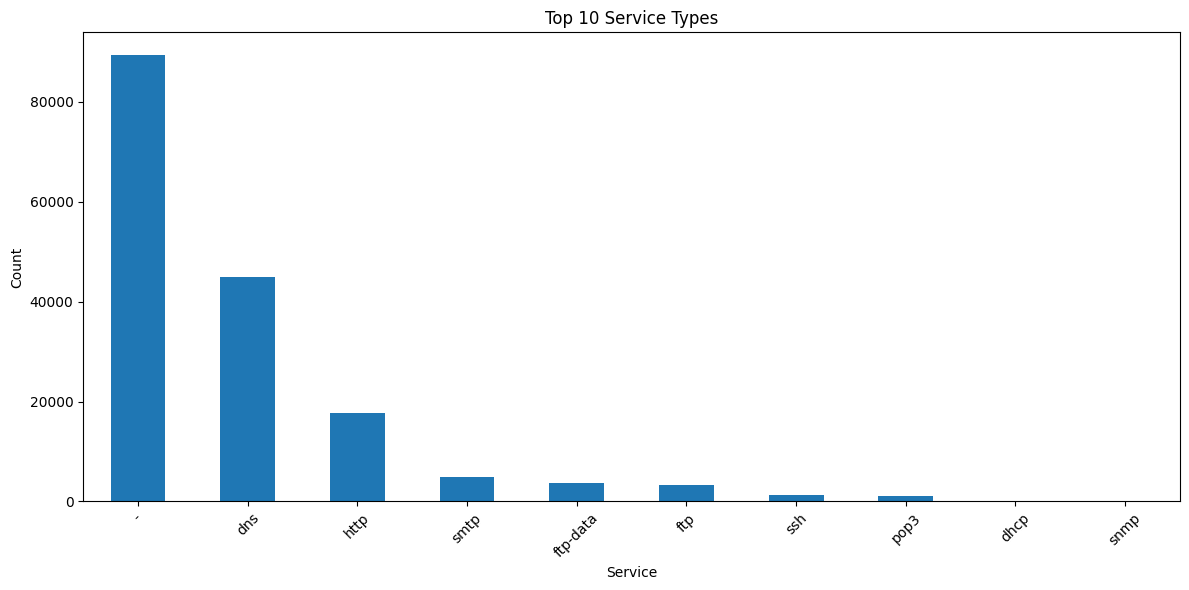

In [272]:
# 6. Additional visualizations
# Service type distribution
plt.figure(figsize=(12, 6))
train_df['service'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Service Types')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'sbytes'}>,
        <Axes: title={'center': 'dbytes'}>,
        <Axes: title={'center': 'sttl'}>,
        <Axes: title={'center': 'dttl'}>,
        <Axes: title={'center': 'sloss'}>],
       [<Axes: title={'center': 'dloss'}>,
        <Axes: title={'center': 'sload'}>,
        <Axes: title={'center': 'dload'}>,
        <Axes: title={'center': 'spkts'}>,
        <Axes: title={'center': 'dpkts'}>,
        <Axes: title={'center': 'sjit'}>],
       [<Axes: title={'center': 'djit'}>,
        <Axes: title={'center': 'sinpkt'}>,
        <Axes: title={'center': 'dinpkt'}>,
        <Axes: title={'center': 'tcprtt'}>,
        <Axes: title={'center': 'synack'}>,
        <Axes: title={'center': 'ackdat'}>],
       [<Axes: title={'center': 'swin'}>,
        <Axes: title={'center': 'dwin'}>,
        <Axes: title={'center': 'stcpb'}>,
        <Axes: title={'center': 'dtcpb'}>,
        <Axes: title={'center': 'smean'}>,
        <

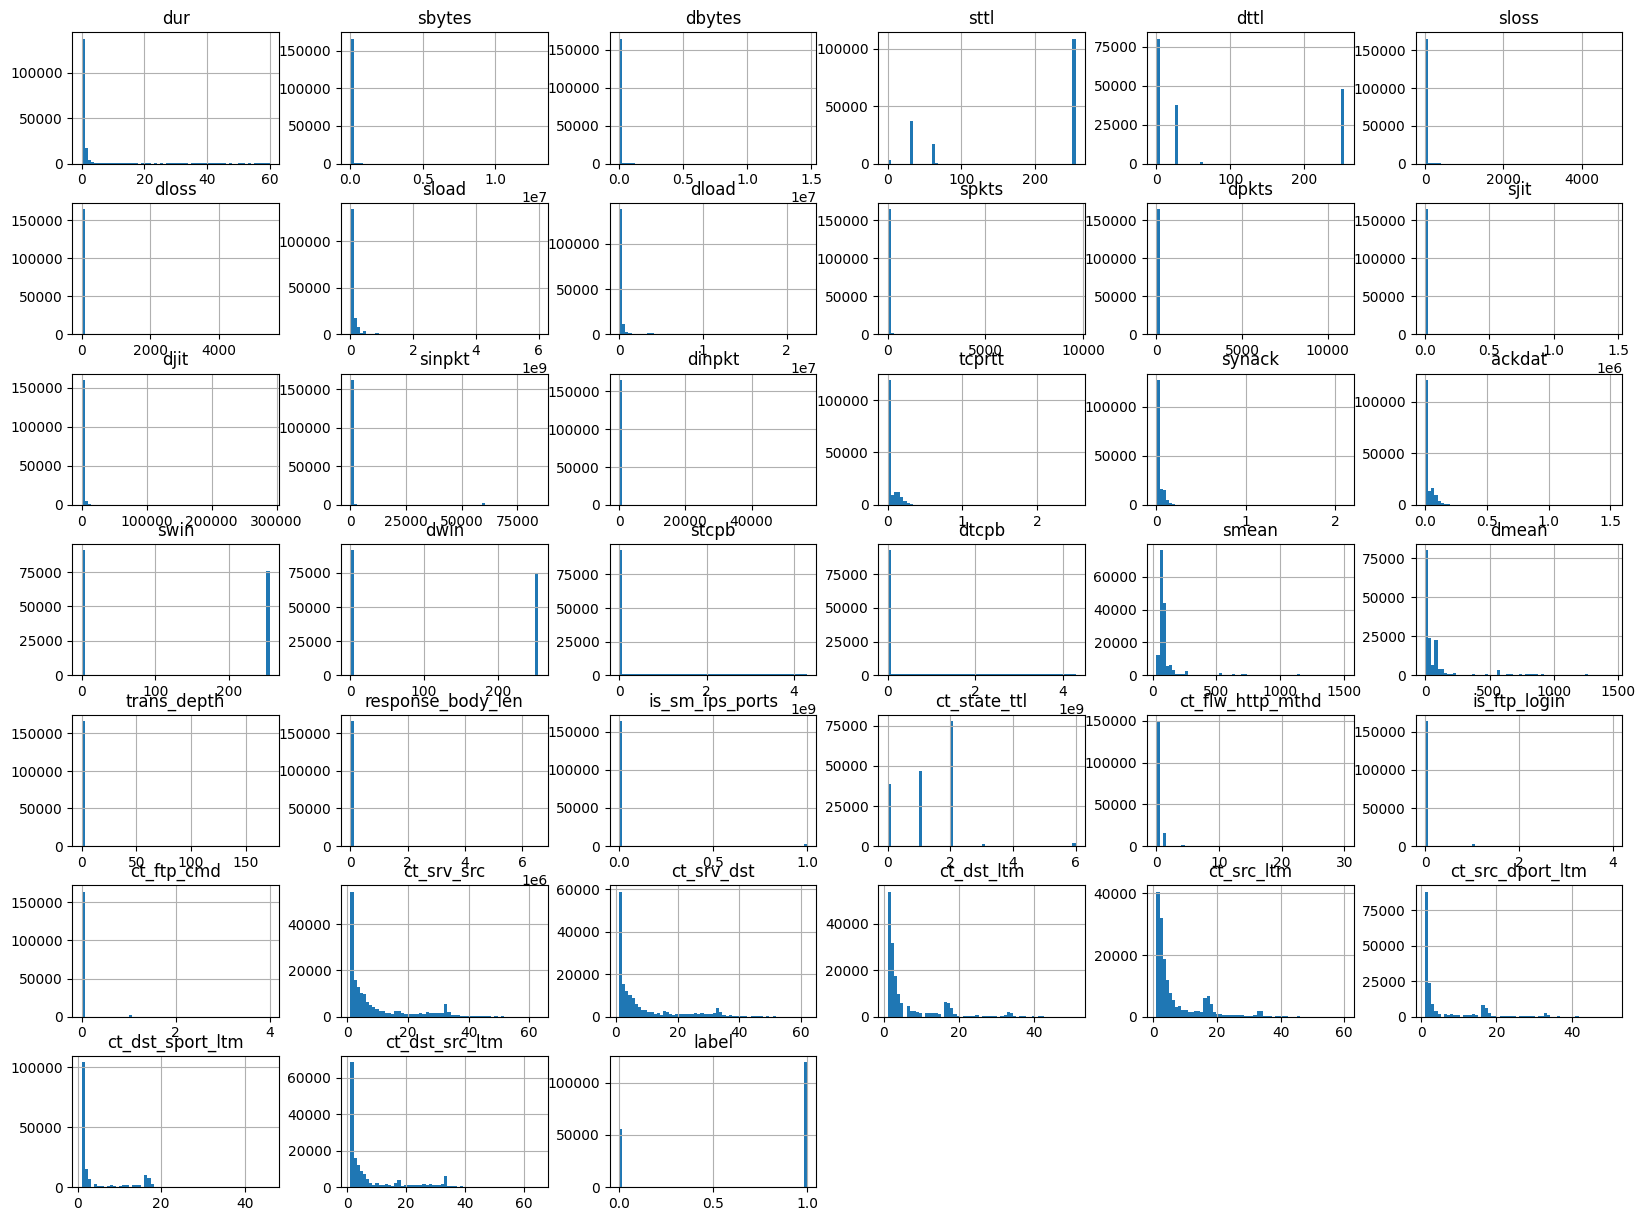

In [273]:
train_df.hist(bins=60, figsize=(20, 15))

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [274]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
x = train_df.drop(columns=["label"])
y = train_df["label"]

# Split into training and validation sets (80% train, 20% validation)
train_set, val_set, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Combine features and target back into dataframes for convenience
train_set["label"] = y_train
val_set["label"] = y_val

# Display the size of each set
print(f"Original dataset: {train_df.shape}")
print(f"Training set: {train_set.shape}")
print(f"Validation set: {val_set.shape}")

Original dataset: (175341, 43)
Training set: (140272, 43)
Validation set: (35069, 43)


In [275]:
train_set

state       dur   sbytes  dbytes   sttl   dttl  sloss  dloss service  \
96203    FIN  0.778778    608.0   646.0  254.0  252.0    2.0    3.0       -   
58960    INT  0.000009    200.0     0.0  254.0    NaN    0.0    0.0       -   
65069    INT  0.000009    114.0     0.0  254.0    0.0    0.0    0.0     dns   
64133    INT  0.000008    114.0     0.0  254.0    0.0    0.0    0.0     dns   
111445   FIN  0.627731    818.0  1062.0   62.0  252.0    2.0    2.0    http   
...      ...       ...      ...     ...    ...    ...    ...    ...     ...   
119879   FIN  1.240960  10988.0   354.0  254.0  252.0    5.0    1.0       -   
103694   FIN  0.949207    564.0   354.0  254.0  252.0    2.0    1.0       -   
131932   INT  0.000002    114.0     NaN  254.0    0.0    0.0    0.0     dns   
146867   INT  0.000003      NaN     0.0    NaN    0.0    0.0    0.0     dns   
121958   NaN  0.001820    528.0   304.0   31.0   29.0    0.0    0.0       -   

               sload         dload  spkts  dpkts proto         sjit  \
96203   5.629332e+03  5.978597e+03   10.0   10.0   NaN  4604.553147   
58960   8.888889e+07  0.000000e+00    2.0    0.0  mhrp     0.000000   
65069   5.066666e+07  0.000000e+00    2.0    0.0   udp     0.000000   
64133   5.700000e+07  0.000000e+00    2.0    0.0   udp     0.000000   
111445  9.392558e+03           NaN   10.0    8.0   tcp  3454.559695   
...              ...           ...    ...    ...   ...          ...   
119879  6.641310e+04  1.998453e+03   16.0    8.0   tcp  6282.365879   
103694  4.281469e+03  2.612707e+03   10.0    8.0   tcp  6986.891881   
131932  2.280000e+08  0.000000e+00    2.0    0.0   udp     0.000000   
146867  1.520000e+08  0.000000e+00    2.0    0.0   udp     0.000000   
121958  1.740659e+06  1.002198e+06    NaN    4.0   udp     0.672223   

              djit      sinpkt      dinpkt    tcprtt    synack    ackdat  \
96203   102.742672   86.430667   81.175219  0.122210  0.048200  0.074010   
58960     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000   
65069     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000   
64133     0.000000         NaN    0.000000       NaN  0.000000  0.000000   
111445  115.159023   69.747889   74.994711  0.203372  0.102021  0.101351   
...            ...         ...         ...       ...       ...       ...   
119879  240.295547   82.730666  159.926422  0.143100  0.101635  0.041465   
103694  182.607109  102.387556  126.500711  0.135252  0.063701  0.071551   
131932    0.000000    0.002000    0.000000  0.000000  0.000000  0.000000   
146867    0.000000    0.003000    0.000000  0.000000  0.000000  0.000000   
121958    0.296280    0.480333    0.215000  0.000000  0.000000       NaN   

         swin   dwin         stcpb         dtcpb  smean  dmean  trans_depth  \
96203   255.0  255.0  9.938877e+07  2.141775e+09   61.0   65.0          0.0   
58960     0.0    0.0  0.000000e+00  0.000000e+00  100.0    0.0          0.0   
65069     0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          NaN   
64133     NaN    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
111445  255.0  255.0  1.107078e+08           NaN   82.0  133.0          1.0   
...       ...    ...           ...           ...    ...    ...          ...   
119879  255.0  255.0  1.946653e+09  1.496377e+09  687.0    NaN          0.0   
103694  255.0  255.0  3.309830e+09  3.264820e+09   56.0   44.0          NaN   
131932    0.0    0.0  0.000000e+00  0.000000e+00    NaN    0.0          0.0   
146867    0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
121958    NaN    0.0  0.000000e+00  0.000000e+00  132.0   76.0          0.0   

        response_body_len  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  \
96203                 0.0              0.0           1.0               0.0   
58960                 0.0              0.0           2.0               0.0   
65069                 0.0              0.0           2.0               0.0   
64133                 0.0      

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [276]:
# Checking missing values in the training set

train_set.isnull().sum()

state                7034
dur                  6957
sbytes               6836
dbytes               7069
sttl                 7022
dttl                 6937
sloss                7004
dloss                7209
service              7038
sload                7006
dload                7096
spkts                6959
dpkts                6918
proto                7033
sjit                 7015
djit                 7109
sinpkt               6953
dinpkt               6999
tcprtt               7093
synack               6943
ackdat               6886
swin                 6971
dwin                 6999
stcpb                6941
dtcpb                7072
smean                7008
dmean                7078
trans_depth          7001
response_body_len    6999
is_sm_ips_ports      7028
ct_state_ttl         7000
ct_flw_http_mthd     6946
is_ftp_login         6910
ct_ftp_cmd           7057
ct_srv_src           7102
ct_srv_dst           7015
ct_dst_ltm           7004
ct_src_ltm           7028
ct_src_dport

In [277]:
from sklearn.impute import SimpleImputer

# Seperate numerical and categorical features
num_cols = train_set.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_set.select_dtypes(include=['object']).columns

# Impute missing values in numerical features
num_imputer = SimpleImputer(strategy='median')
train_set[num_cols] = num_imputer.fit_transform(train_set[num_cols])

# Impute missing values in categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
train_set[cat_cols] = cat_imputer.fit_transform(train_set[cat_cols])

# Check if there are any missing values left
missing_values = train_set.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


##### PENJELASAN PEMILIHAN METODE SOON ...

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [278]:
# Identify outliers
Q1 = train_set[num_cols].quantile(0.25)
Q3 = train_set[num_cols].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

((train_set[num_cols] < lower_limit) | (train_set[num_cols] > upper_limit)).sum()

dur                  12816
sbytes               18538
dbytes               24273
sttl                     0
dttl                     0
sloss                22372
dloss                21617
sload                10408
dload                31631
spkts                18847
dpkts                15869
sjit                 16279
djit                 16441
sinpkt               12604
dinpkt               13895
tcprtt               17514
synack               30739
ackdat               11121
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smean                15838
dmean                18145
trans_depth          13640
response_body_len     8601
is_sm_ips_ports       2098
ct_state_ttl          1479
ct_flw_http_mthd     13661
is_ftp_login          1930
ct_ftp_cmd            1937
ct_srv_src           18184
ct_srv_dst           18222
ct_dst_ltm           24184
ct_src_ltm           14452
ct_src_dport_ltm     28565
ct_dst_sport_ltm     28295
c

In [279]:
train_set[(train_set[num_cols] < lower_limit) | (train_set[num_cols] > upper_limit)]

state  dur   sbytes  dbytes  sttl  dttl  sloss  dloss service  \
96203    NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   
58960    NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   
65069    NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   
64133    NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   
111445   NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   
...      ...  ...      ...     ...   ...   ...    ...    ...     ...   
119879   NaN  NaN  10988.0     NaN   NaN   NaN    NaN    NaN     NaN   
103694   NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   
131932   NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   
146867   NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   
121958   NaN  NaN      NaN     NaN   NaN   NaN    NaN    NaN     NaN   

              sload        dload  spkts  dpkts proto         sjit  djit  \
96203           NaN          NaN    NaN    NaN   NaN          NaN   NaN   
58960           NaN          NaN    NaN    NaN   NaN          NaN   NaN   
65069           NaN          NaN    NaN    NaN   NaN          NaN   NaN   
64133           NaN          NaN    NaN    NaN   NaN          NaN   NaN   
111445          NaN          NaN    NaN    NaN   NaN          NaN   NaN   
...             ...          ...    ...    ...   ...          ...   ...   
119879          NaN          NaN    NaN    NaN   NaN  6282.365879   NaN   
103694          NaN          NaN    NaN    NaN   NaN  6986.891881   NaN   
131932  228000000.0          NaN    NaN    NaN   NaN          NaN   NaN   
146867          NaN          NaN    NaN    NaN   NaN          NaN   NaN   
121958          NaN  1002197.813    NaN    NaN   NaN          NaN   NaN   

        sinpkt      dinpkt    tcprtt    synack    ackdat  swin  dwin  stcpb  \
96203      NaN         NaN       NaN  0.048200       NaN   NaN   NaN    NaN   
58960      NaN         NaN       NaN       NaN       NaN   NaN   NaN    NaN   
65069      NaN         NaN       NaN       NaN       NaN   NaN   NaN    NaN   
64133      NaN         NaN       NaN       NaN       NaN   NaN   NaN    NaN   
111445     NaN         NaN  0.203372  0.102021  0.101351   NaN   NaN    NaN   
...        ...         ...       ...       ...       ...   ...   ...    ...   
119879     NaN  159.926422  0.143100  0.101635       NaN   NaN   NaN    NaN   
103694     NaN  126.500711       NaN  0.063701       NaN   NaN   NaN    NaN   
131932     NaN         NaN       NaN       NaN       NaN   NaN   NaN    NaN   
146867     NaN         NaN       NaN       NaN       NaN   NaN   NaN    NaN   
121958     NaN         NaN       NaN       NaN       NaN   NaN   NaN    NaN   

        dtcpb  smean  dmean  trans_depth  response_body_len  is_sm_ips_ports  \
96203     NaN    NaN    NaN          NaN                NaN              NaN   
58960     NaN    NaN    NaN          NaN                NaN              NaN   
65069     NaN    NaN    NaN          NaN                NaN              NaN   
64133     NaN    NaN    NaN          NaN                NaN              NaN   
111445    NaN    NaN    NaN          1.0              249.0              NaN   
...       ...    ...    ...          ...                ...              ...   
119879    NaN  687.0    NaN          NaN                NaN              NaN   
103694    NaN    NaN    NaN          NaN                NaN              NaN   
131932    NaN    NaN    NaN          NaN                NaN              NaN   
146867    NaN    NaN    NaN          NaN                NaN              NaN   
121958    NaN    NaN    NaN          NaN                NaN              NaN   

        ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  ct_srv_src  \
96203            NaN               NaN           NaN         NaN         NaN   
58960            NaN               NaN           NaN         NaN         NaN   
65069            NaN               NaN           NaN         NaN        28.0   
64133      

In [280]:
# Data before capping

train_set

state       dur   sbytes  dbytes   sttl   dttl  sloss  dloss service  \
96203    FIN  0.778778    608.0   646.0  254.0  252.0    2.0    3.0       -   
58960    INT  0.000009    200.0     0.0  254.0   29.0    0.0    0.0       -   
65069    INT  0.000009    114.0     0.0  254.0    0.0    0.0    0.0     dns   
64133    INT  0.000008    114.0     0.0  254.0    0.0    0.0    0.0     dns   
111445   FIN  0.627731    818.0  1062.0   62.0  252.0    2.0    2.0    http   
...      ...       ...      ...     ...    ...    ...    ...    ...     ...   
119879   FIN  1.240960  10988.0   354.0  254.0  252.0    5.0    1.0       -   
103694   FIN  0.949207    564.0   354.0  254.0  252.0    2.0    1.0       -   
131932   INT  0.000002    114.0   162.0  254.0    0.0    0.0    0.0     dns   
146867   INT  0.000003    450.0     0.0  254.0    0.0    0.0    0.0     dns   
121958   INT  0.001820    528.0   304.0   31.0   29.0    0.0    0.0       -   

               sload         dload  spkts  dpkts proto         sjit  \
96203   5.629332e+03  5.978597e+03   10.0   10.0   tcp  4604.553147   
58960   8.888889e+07  0.000000e+00    2.0    0.0  mhrp     0.000000   
65069   5.066666e+07  0.000000e+00    2.0    0.0   udp     0.000000   
64133   5.700000e+07  0.000000e+00    2.0    0.0   udp     0.000000   
111445  9.392558e+03  1.411759e+03   10.0    8.0   tcp  3454.559695   
...              ...           ...    ...    ...   ...          ...   
119879  6.641310e+04  1.998453e+03   16.0    8.0   tcp  6282.365879   
103694  4.281469e+03  2.612707e+03   10.0    8.0   tcp  6986.891881   
131932  2.280000e+08  0.000000e+00    2.0    0.0   udp     0.000000   
146867  1.520000e+08  0.000000e+00    2.0    0.0   udp     0.000000   
121958  1.740659e+06  1.002198e+06    2.0    4.0   udp     0.672223   

              djit      sinpkt      dinpkt    tcprtt    synack    ackdat  \
96203   102.742672   86.430667   81.175219  0.122210  0.048200  0.074010   
58960     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000   
65069     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000   
64133     0.000000    0.280048    0.000000  0.000000  0.000000  0.000000   
111445  115.159023   69.747889   74.994711  0.203372  0.102021  0.101351   
...            ...         ...         ...       ...       ...       ...   
119879  240.295547   82.730666  159.926422  0.143100  0.101635  0.041465   
103694  182.607109  102.387556  126.500711  0.135252  0.063701  0.071551   
131932    0.000000    0.002000    0.000000  0.000000  0.000000  0.000000   
146867    0.000000    0.003000    0.000000  0.000000  0.000000  0.000000   
121958    0.296280    0.480333    0.215000  0.000000  0.000000  0.000000   

         swin   dwin         stcpb         dtcpb  smean  dmean  trans_depth  \
96203   255.0  255.0  9.938877e+07  2.141775e+09   61.0   65.0          0.0   
58960     0.0    0.0  0.000000e+00  0.000000e+00  100.0    0.0          0.0   
65069     0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
64133     0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
111445  255.0  255.0  1.107078e+08  0.000000e+00   82.0  133.0          1.0   
...       ...    ...           ...           ...    ...    ...          ...   
119879  255.0  255.0  1.946653e+09  1.496377e+09  687.0   44.0          0.0   
103694  255.0  255.0  3.309830e+09  3.264820e+09   56.0   44.0          0.0   
131932    0.0    0.0  0.000000e+00  0.000000e+00   73.0    0.0          0.0   
146867    0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
121958    0.0    0.0  0.000000e+00  0.000000e+00  132.0   76.0          0.0   

        response_body_len  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  \
96203                 0.0              0.0           1.0               0.0   
58960                 0.0              0.0           2.0               0.0   
65069                 0.0              0.0           2.0               0.0   
64133                 0.0      

In [281]:
# Cap outliers
capped_df = train_set.copy()
for col in num_cols:
    capped_df[col] = np.where(capped_df[col] < lower_limit[col], lower_limit[col], capped_df[col])
    capped_df[col] = np.where(capped_df[col] > upper_limit[col], upper_limit[col], capped_df[col])

# Display the capped DataFrame
capped_df

state       dur  sbytes  dbytes   sttl   dttl  sloss  dloss service  \
96203    FIN  0.778778   608.0   646.0  254.0  252.0    2.0    3.0       -   
58960    INT  0.000009   200.0     0.0  254.0   29.0    0.0    0.0       -   
65069    INT  0.000009   114.0     0.0  254.0    0.0    0.0    0.0     dns   
64133    INT  0.000008   114.0     0.0  254.0    0.0    0.0    0.0     dns   
111445   FIN  0.627731   818.0  1062.0   62.0  252.0    2.0    2.0    http   
...      ...       ...     ...     ...    ...    ...    ...    ...     ...   
119879   FIN  1.240960  2999.0   354.0  254.0  252.0    5.0    1.0       -   
103694   FIN  0.949207   564.0   354.0  254.0  252.0    2.0    1.0       -   
131932   INT  0.000002   114.0   162.0  254.0    0.0    0.0    0.0     dns   
146867   INT  0.000003   450.0     0.0  254.0    0.0    0.0    0.0     dns   
121958   INT  0.001820   528.0   304.0   31.0   29.0    0.0    0.0       -   

               sload         dload  spkts  dpkts proto         sjit  \
96203   5.629332e+03   5978.597168   10.0   10.0   tcp  4604.553147   
58960   8.888889e+07      0.000000    2.0    0.0  mhrp     0.000000   
65069   5.066666e+07      0.000000    2.0    0.0   udp     0.000000   
64133   5.700000e+07      0.000000    2.0    0.0   udp     0.000000   
111445  9.392558e+03   1411.759339   10.0    8.0   tcp  3454.559695   
...              ...           ...    ...    ...   ...          ...   
119879  6.641310e+04   1998.452759   16.0    8.0   tcp  5549.888803   
103694  4.281469e+03   2612.707275   10.0    8.0   tcp  5549.888803   
131932  2.149777e+08      0.000000    2.0    0.0   udp     0.000000   
146867  1.520000e+08      0.000000    2.0    0.0   udp     0.000000   
121958  1.740659e+06  43618.009044    2.0    4.0   udp     0.672223   

              djit      sinpkt      dinpkt    tcprtt    synack    ackdat  \
96203   102.742672   86.430667   81.175219  0.122210  0.037194  0.074010   
58960     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000   
65069     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000   
64133     0.000000    0.280048    0.000000  0.000000  0.000000  0.000000   
111445  115.159023   69.747889   74.994711  0.139764  0.037194  0.080431   
...            ...         ...         ...       ...       ...       ...   
119879  240.295547   82.730666  111.070729  0.139764  0.037194  0.041465   
103694  182.607109  102.387556  111.070729  0.135252  0.037194  0.071551   
131932    0.000000    0.002000    0.000000  0.000000  0.000000  0.000000   
146867    0.000000    0.003000    0.000000  0.000000  0.000000  0.000000   
121958    0.296280    0.480333    0.215000  0.000000  0.000000  0.000000   

         swin   dwin         stcpb         dtcpb  smean  dmean  trans_depth  \
96203   255.0  255.0  9.938877e+07  2.141775e+09   61.0   65.0          0.0   
58960     0.0    0.0  0.000000e+00  0.000000e+00  100.0    0.0          0.0   
65069     0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
64133     0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
111445  255.0  255.0  1.107078e+08  0.000000e+00   82.0  133.0          0.0   
...       ...    ...           ...           ...    ...    ...          ...   
119879  255.0  255.0  1.946653e+09  1.496377e+09  164.5   44.0          0.0   
103694  255.0  255.0  3.309830e+09  3.264820e+09   56.0   44.0          0.0   
131932    0.0    0.0  0.000000e+00  0.000000e+00   73.0    0.0          0.0   
146867    0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
121958    0.0    0.0  0.000000e+00  0.000000e+00  132.0   76.0          0.0   

        response_body_len  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  \
96203                 0.0              0.0           1.0               0.0   
58960                 0.0              0.0           2.0               0.0   
65069                 0.0              0.0           2.0               0.0   
64133                 0.0              0.0 

In [282]:
for col in num_cols:
    print(f"Column: {col}")
    print(f"Lower bound: {lower_limit[col]}")
    print(f"Upper bound: {upper_limit[col]}")
    print()

Column: dur
Lower bound: -0.9382855
Upper bound: 1.5638305

Column: sbytes
Lower bound: -1617.0
Upper bound: 2999.0

Column: dbytes
Lower bound: -1254.0
Upper bound: 2090.0

Column: sttl
Lower bound: -226.0
Upper bound: 542.0

Column: dttl
Lower bound: -378.0
Upper bound: 630.0

Column: sloss
Lower bound: -3.0
Upper bound: 5.0

Column: dloss
Lower bound: -3.0
Upper bound: 5.0

Column: sload
Lower bound: -128962894.00390625
Upper bound: 214977736.40234375

Column: dload
Lower bound: -26170.805426250005
Upper bound: 43618.009043750004

Column: spkts
Lower bound: -13.0
Upper bound: 27.0

Column: dpkts
Lower bound: -15.0
Upper bound: 25.0

Column: sjit
Lower bound: -3329.933281875
Upper bound: 5549.888803125

Column: djit
Lower bound: -158.467936875
Upper bound: 264.113228125

Column: sinpkt
Lower bound: -75.5858845
Upper bound: 125.9978075

Column: dinpkt
Lower bound: -66.642437625
Upper bound: 111.070729375

Column: tcprtt
Lower bound: -0.08385825000000001
Upper bound: 0.1397637500000000

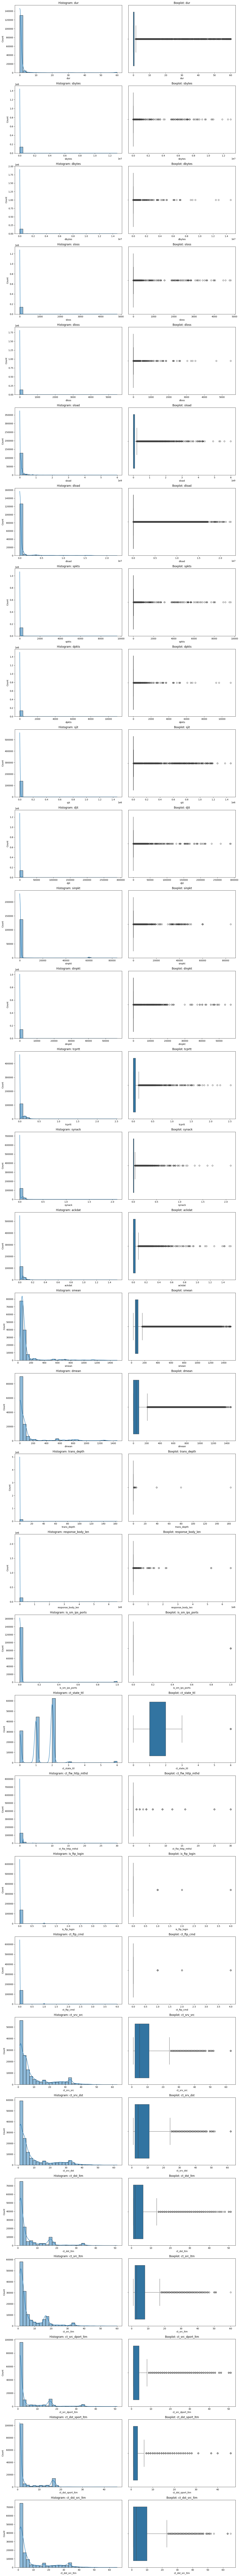

In [283]:
# Find outliers
outliers = (train_set[num_cols] < lower_limit) | (train_set[num_cols] > upper_limit)

# Identify columns with outliers
columns_with_outliers = outliers.any(axis=0)
outliers_columns = columns_with_outliers[columns_with_outliers].index

# Visualize the data for columns with outliers
fig, axes = plt.subplots(nrows=len(outliers_columns), ncols=2, figsize=(15, 5 * len(outliers_columns)))

for i, col in enumerate(outliers_columns):
    sns.histplot(train_set[col], bins=30, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram: {col}')
    sns.boxplot(x=train_set[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()

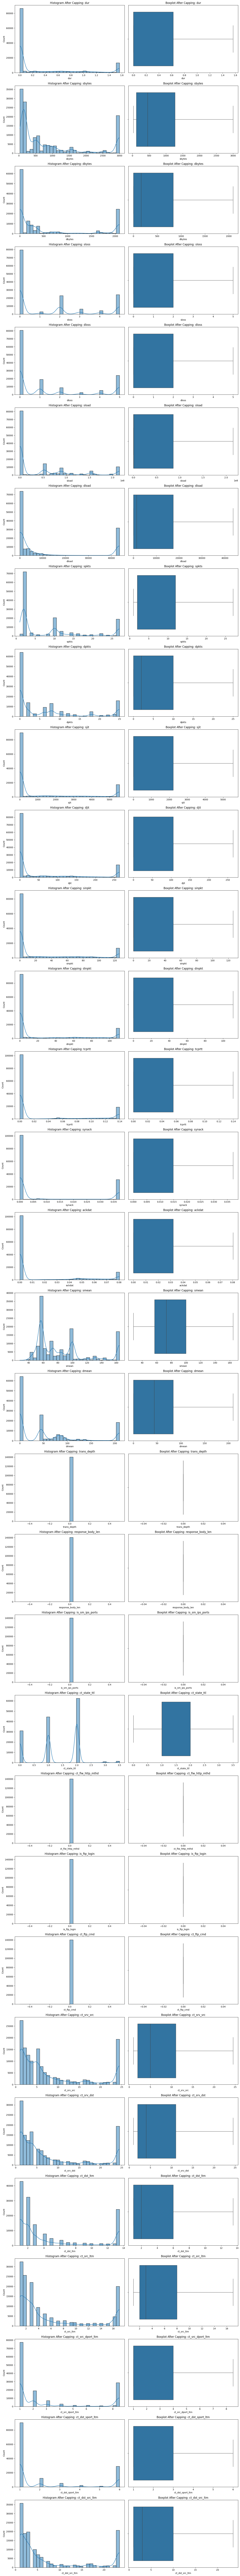

In [284]:
# Visualize the data after capping
fig, axes = plt.subplots(nrows=len(outliers_columns), ncols=2, figsize=(15, 5 * len(outliers_columns)))

for i, col in enumerate(outliers_columns):
    sns.histplot(capped_df[col], bins=30, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram After Capping: {col}')
    sns.boxplot(x=capped_df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot After Capping: {col}')

plt.tight_layout()
plt.show()

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [285]:
# Check for duplicates
duplicate_rows = capped_df[capped_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows


Number of duplicate rows: 25911


state       dur  sbytes  dbytes   sttl  dttl  sloss  dloss service  \
46348    INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
165736   INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
147494   INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
6533     INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
173393   INT  0.000006   114.0     0.0  254.0   0.0    0.0    0.0     dns   
...      ...       ...     ...     ...    ...   ...    ...    ...     ...   
16023    INT  0.000000    46.0     0.0    0.0   0.0    0.0    0.0       -   
112727   INT  0.000008   114.0     0.0  254.0   0.0    0.0    0.0     dns   
87498    INT  0.000009   114.0     0.0  254.0   0.0    0.0    0.0     dns   
137337   INT  0.000005   114.0     0.0  254.0   0.0    0.0    0.0     dns   
146867   INT  0.000003   450.0     0.0  254.0   0.0    0.0    0.0     dns   

              sload  dload  spkts  dpkts proto  sjit  djit      sinpkt  \
46348    50666664.0    0.0    2.0    0.0   udp   0.0   0.0    0.009000   
165736   50666664.0    0.0    2.0    0.0   udp   0.0   0.0    0.009000   
147494   50666664.0    0.0    2.0    0.0   udp   0.0   0.0    0.009000   
6533     50666664.0    0.0    2.0    0.0   udp   0.0   0.0    0.009000   
173393   76000000.0    0.0    2.0    0.0   udp   0.0   0.0    0.006000   
...             ...    ...    ...    ...   ...   ...   ...         ...   
16023           0.0    0.0    1.0    0.0   arp   0.0   0.0  125.997807   
112727   57000000.0    0.0    2.0    0.0   udp   0.0   0.0    0.008000   
87498    50666664.0    0.0    2.0    0.0   udp   0.0   0.0    0.009000   
137337   91200000.0    0.0    2.0    0.0   udp   0.0   0.0    0.005000   
146867  152000000.0    0.0    2.0    0.0   udp   0.0   0.0    0.003000   

        dinpkt  tcprtt  synack  ackdat  swin  dwin  stcpb  dtcpb  smean  \
46348    0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   
165736   0.006     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   
147494   0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   
6533     0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   
173393   0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   
...        ...     ...     ...     ...   ...   ...    ...    ...    ...   
16023    0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   46.0   
112727   0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   
87498    0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   
137337   0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   
146867   0.000     0.0     0.0     0.0   0.0   0.0    0.0    0.0   57.0   

        dmean  trans_depth  response_body_len  is_sm_ips_ports  ct_state_ttl  \
46348     0.0          0.0                0.0              0.0           2.0   
165736    0.0          0.0                0.0              0.0           2.0   
147494    0.0          0.0                0.0              0.0           2.0   
6533      0.0          0.0                0.0              0.0           2.0   
173393    0.0          0.0                0.0              0.0           2.0   
...       ...          ...                ...              ...           ...   
16023     0.0          0.0                0.0              0.0           2.0   
112727    0.0          0.0                0.0              0.0           2.0   
87498     0.0          0.0                0.0              0.0           2.0   
137337    0.0          0.0                0.0              0.0           2.0   
146867    0.0          0.0                0.0              0.0           2.0   

        ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  ct_srv_src  ct_srv_dst  \
46348                0.0           0.0         0.0        24.5        24.5   
165736               0.0           0.0         0.0        24.5        24.5   
147494               0.0           0.0         0.0        24.5        24.5   
6533               

In [288]:
capped_df = capped_df.drop_duplicates()

# Check for duplicates
duplicate_rows = capped_df[capped_df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [290]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

class NetworkFeatureEngineering:
    def __init__(self, df):
        self.df = df.copy()
        
    def select_features(self, k=20):
        """Select top k most important features"""
        # Get numeric columns only
        numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        X = self.df[numeric_cols].drop(['label'], axis=1, errors='ignore')
        y = self.df['label']
        
        # Select top k features
        selector = SelectKBest(f_classif, k=k)
        selector.fit(X, y)
        
        # Get selected feature names
        selected_features = X.columns[selector.get_support()].tolist()
        print("Selected features:", selected_features)
        return selected_features

    def create_interaction_features(self):
        """Create interaction features from network metrics"""
        # Bytes ratio
        self.df['bytes_ratio'] = self.df['sbytes'] / (self.df['dbytes'] + 1)
        
        # Packet ratio
        self.df['packet_ratio'] = self.df['spkts'] / (self.df['dpkts'] + 1)
        
        # Average bytes per packet
        self.df['avg_bytes_per_packet'] = (self.df['sbytes'] + self.df['dbytes']) / (self.df['spkts'] + self.df['dpkts'] + 1)
        
        return self.df
    
    def add_polynomial_features(self, columns=['dur', 'sbytes', 'dbytes']):
        """Add polynomial features for specified columns"""
        poly = PolynomialFeatures(degree=2, include_bias=False)
        
        for col in columns:
            # Create polynomial features
            poly_features = poly.fit_transform(self.df[[col]])
            # Add squared term
            self.df[f'{col}_squared'] = poly_features[:, 1]
            
        return self.df
    
    def create_domain_features(self):
        """Create domain-specific network features"""
        # Total bytes transferred
        self.df['total_bytes'] = self.df['sbytes'] + self.df['dbytes']
        
        # Total packets transferred
        self.df['total_packets'] = self.df['spkts'] + self.df['dpkts']
        
        # Connection duration categories
        self.df['duration_cat'] = pd.cut(
            self.df['dur'], 
            bins=[-np.inf, 0.0, 0.01, 0.1, 1.0, 10.0, 30.0, 60.0],
            labels=['zero', 'microsecond', 'millisecond', 'second', 'few_seconds', 'half_minute', 'minute'],
            include_lowest=True
        )
        
        # Loss ratio
        self.df['loss_ratio'] = (self.df['sloss'] + self.df['dloss']) / (self.df['total_packets'] + 1)
        
        return self.df
    
    def bin_features(self, columns=['total_bytes', 'total_packets'], n_bins=3):
        """Bin continuous features into categories"""
        
        # Reduce number of bins
        kbd = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
        
        for col in columns:
            if col in self.df.columns:
                values = self.df[[col]]
                self.df[f'{col}_binned'] = kbd.fit_transform(values)
                    
        return self.df
    
    def transform(self):
        """Apply all feature engineering steps"""
        self.create_interaction_features()
        self.add_polynomial_features()
        self.create_domain_features()
        self.bin_features()
        selected_features = self.select_features()
        
        return self.df

# Apply feature engineering to cleaned data -> data that doesn't have missing values
fe = NetworkFeatureEngineering(capped_df)
engineered_df = fe.transform()

# Show new features
new_features = set(engineered_df.columns) - set(capped_df.columns)
print("\nNewly created features:")
print(list(new_features))

Selected features: ['sbytes', 'dbytes', 'sttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dmean', 'ct_state_ttl', 'ct_dst_sport_ltm', 'sbytes_squared', 'dbytes_squared', 'total_bytes', 'total_packets', 'loss_ratio', 'total_bytes_binned', 'total_packets_binned']

Newly created features:
['dbytes_squared', 'duration_cat', 'total_packets', 'packet_ratio', 'total_bytes_binned', 'bytes_ratio', 'total_bytes', 'sbytes_squared', 'dur_squared', 'total_packets_binned', 'loss_ratio', 'avg_bytes_per_packet']


c:\Users\Auralea A S\Documents\SEMESTER 5\TUBES SEM 5\Tubes2_AI_atk_hlic\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [24 25 26 28 29 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Auralea A S\Documents\SEMESTER 5\TUBES SEM 5\Tubes2_AI_atk_hlic\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [291]:
new_features

{'avg_bytes_per_packet',
 'bytes_ratio',
 'dbytes_squared',
 'dur_squared',
 'duration_cat',
 'loss_ratio',
 'packet_ratio',
 'sbytes_squared',
 'total_bytes',
 'total_bytes_binned',
 'total_packets',
 'total_packets_binned'}

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [39]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [294]:
engineered_df

state       dur  sbytes  dbytes   sttl   dttl  sloss  dloss service  \
96203    FIN  0.778778   608.0   646.0  254.0  252.0    2.0    3.0       -   
58960    INT  0.000009   200.0     0.0  254.0   29.0    0.0    0.0       -   
65069    INT  0.000009   114.0     0.0  254.0    0.0    0.0    0.0     dns   
64133    INT  0.000008   114.0     0.0  254.0    0.0    0.0    0.0     dns   
111445   FIN  0.627731   818.0  1062.0   62.0  252.0    2.0    2.0    http   
...      ...       ...     ...     ...    ...    ...    ...    ...     ...   
110268   FIN  0.223079   812.0  1398.0   62.0  252.0    2.0    2.0       -   
119879   FIN  1.240960  2999.0   354.0  254.0  252.0    5.0    1.0       -   
103694   FIN  0.949207   564.0   354.0  254.0  252.0    2.0    1.0       -   
131932   INT  0.000002   114.0   162.0  254.0    0.0    0.0    0.0     dns   
121958   INT  0.001820   528.0   304.0   31.0   29.0    0.0    0.0       -   

               sload         dload  spkts  dpkts proto         sjit  \
96203   5.629332e+03   5978.597168   10.0   10.0   tcp  4604.553147   
58960   8.888889e+07      0.000000    2.0    0.0  mhrp     0.000000   
65069   5.066666e+07      0.000000    2.0    0.0   udp     0.000000   
64133   5.700000e+07      0.000000    2.0    0.0   udp     0.000000   
111445  9.392558e+03   1411.759339   10.0    8.0   tcp  3454.559695   
...              ...           ...    ...    ...   ...          ...   
110268  2.621493e+04  43618.009044   10.0    8.0   tcp  1336.206395   
119879  6.641310e+04   1998.452759   16.0    8.0   tcp  5549.888803   
103694  4.281469e+03   2612.707275   10.0    8.0   tcp  5549.888803   
131932  2.149777e+08      0.000000    2.0    0.0   udp     0.000000   
121958  1.740659e+06  43618.009044    2.0    4.0   udp     0.672223   

              djit      sinpkt      dinpkt    tcprtt    synack    ackdat  \
96203   102.742672   86.430667   81.175219  0.122210  0.037194  0.074010   
58960     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000   
65069     0.000000    0.009000    0.000000  0.000000  0.000000  0.000000   
64133     0.000000    0.280048    0.000000  0.000000  0.000000  0.000000   
111445  115.159023   69.747889   74.994711  0.139764  0.037194  0.080431   
...            ...         ...         ...       ...       ...       ...   
110268   49.524715   24.786556   26.810715  0.032967  0.023482  0.009485   
119879  240.295547   82.730666  111.070729  0.139764  0.037194  0.041465   
103694  182.607109  102.387556  111.070729  0.135252  0.037194  0.071551   
131932    0.000000    0.002000    0.000000  0.000000  0.000000  0.000000   
121958    0.296280    0.480333    0.215000  0.000000  0.000000  0.000000   

         swin   dwin         stcpb         dtcpb  smean  dmean  trans_depth  \
96203   255.0  255.0  9.938877e+07  2.141775e+09   61.0   65.0          0.0   
58960     0.0    0.0  0.000000e+00  0.000000e+00  100.0    0.0          0.0   
65069     0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
64133     0.0    0.0  0.000000e+00  0.000000e+00   57.0    0.0          0.0   
111445  255.0  255.0  1.107078e+08  0.000000e+00   82.0  133.0          0.0   
...       ...    ...           ...           ...    ...    ...          ...   
110268  255.0  255.0  4.087282e+09  4.196189e+09   73.0  175.0          0.0   
119879  255.0  255.0  1.946653e+09  1.496377e+09  164.5   44.0          0.0   
103694  255.0  255.0  3.309830e+09  3.264820e+09   56.0   44.0          0.0   
131932    0.0    0.0  0.000000e+00  0.000000e+00   73.0    0.0          0.0   
121958    0.0    0.0  0.000000e+00  0.000000e+00  132.0   76.0          0.0   

        response_body_len  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  \
96203                 0.0              0.0           1.0               0.0   
58960                 0.0              0.0           2.0               0.0   
65069                 0.0              0.0           2.0               0.0   
64133                 0.0              0.0 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler

class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()
    
    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self
    
    def transform(self, X):
        return self.scaler.transform(X)
    
# Select numerical columns
# num_cols = engineered_df.select_dtypes(include=['float64', 'int64']).columns

# # Apply MinMaxScalerTransformer to numerical columns
# scaler = MinMaxScalerTransformer()
# scaled_num_data = scaler.fit_transform(engineered_df[num_cols])

# # Convert the scaled numerical data back to a DataFrame
# scaled_num_df = pd.DataFrame(scaled_num_data, columns=num_cols)

# scaled_num_df

dur    sbytes    dbytes      sttl      dttl  sloss  dloss  \
0       0.497994  0.195220  0.309091  0.996078  0.992126    0.4    0.6   
1       0.000006  0.057893  0.000000  0.996078  0.114173    0.0    0.0   
2       0.000006  0.028946  0.000000  0.996078  0.000000    0.0    0.0   
3       0.000005  0.028946  0.000000  0.996078  0.000000    0.0    0.0   
4       0.401406  0.265904  0.508134  0.243137  0.992126    0.4    0.4   
...          ...       ...       ...       ...       ...    ...    ...   
114356  0.142649  0.263884  0.668900  0.243137  0.992126    0.4    0.4   
114357  0.793539  1.000000  0.169378  0.996078  0.992126    1.0    0.2   
114358  0.606976  0.180411  0.169378  0.996078  0.992126    0.4    0.2   
114359  0.000001  0.028946  0.077512  0.996078  0.000000    0.0    0.0   
114360  0.001164  0.168294  0.145455  0.121569  0.114173    0.0    0.0   

           sload     dload     spkts  dpkts      sjit      djit    sinpkt  \
0       0.000026  0.137067  0.346154   0.40  0.829666  0.389010  0.685970   
1       0.413480  0.000000  0.038462   0.00  0.000000  0.000000  0.000071   
2       0.235683  0.000000  0.038462   0.00  0.000000  0.000000  0.000071   
3       0.265144  0.000000  0.038462   0.00  0.000000  0.000000  0.002223   
4       0.000044  0.032366  0.346154   0.32  0.622456  0.436021  0.553564   
...          ...       ...       ...    ...       ...       ...       ...   
114356  0.000122  1.000000  0.346154   0.32  0.240763  0.187513  0.196722   
114357  0.000309  0.045817  0.576923   0.32  1.000000  0.909820  0.656604   
114358  0.000020  0.059900  0.346154   0.32  1.000000  0.691397  0.812614   
114359  1.000000  0.000000  0.038462   0.00  0.000000  0.000000  0.000016   
114360  0.008097  1.000000  0.038462   0.16  0.000121  0.001122  0.003812   

          dinpkt    tcprtt    synack    ackdat  swin  dwin     stcpb  \
0       0.730843  0.874404  1.000000  0.920165   1.0   1.0  0.023141   
1       0.000000  0.000000  0.000000  0.000000   0.0   0.0  0.000000   
2       0.000000  0.000000  0.000000  0.000000   0.0   0.0  0.000000   
3       0.000000  0.000000  0.000000  0.000000   0.0   0.0  0.000000   
4       0.675198  1.000000  1.000000  1.000000   1.0   1.0  0.025776   
...          ...       ...       ...       ...   ...   ...       ...   
114356  0.241384  0.235877  0.631332  0.117927   1.0   1.0  0.951646   
114357  1.000000  1.000000  1.000000  0.515533   1.0   1.0  0.453241   
114358  1.000000  0.967719  1.000000  0.889592   1.0   1.0  0.770631   
114359  0.000000  0.000000  0.000000  0.000000   0.0   0.0  0.000000   
114360  0.001936  0.000000  0.000000  0.000000   0.0   0.0  0.000000   

           dtcpb     smean     dmean  trans_depth  response_body_len  \
0       0.498681  0.241758  0.309524          0.0                0.0   
1       0.000000  0.527473  0.000000          0.0                0.0   
2       0.000000  0.212454  0.000000          0.0                0.0   
3       0.000000  0.212454  0.000000          0.0                0.0   
4       0.000000  0.395604  0.633333          0.0                0.0   
...          ...       ...       ...          ...                ...   
114356  0.977021  0.329670  0.833333          0.0                0.0   
114357  0.348409  1.000000  0.209524          0.0                0.0   
114358  0.760165  0.205128  0.209524          0.0                0.0   
114359  0.000000  0.329670  0.000000          0.0                0.0   
114360  0.000000  0.761905  0.361905          0.0                0.0   

        is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  \
0                   0.0      0.285714               0.0           0.0   
1                   0.0      0.571429               0.0           0.0   
2                   0.0      0.571429               0.0           0.0   
3                   0.0      0.571429               0.0           0.0   
4                   0.0      0.285714               0.0           0.0   
...                 ...        

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [181]:
engineered_df.select_dtypes(include=['object']).columns

Index(['state', 'service', 'proto', 'attack_cat'], dtype='object')

In [182]:
engineered_df['service'].unique()

array(['-', 'dns', 'http', 'ftp-data', 'ftp', 'smtp', 'ssh', 'pop3',
       'dhcp', 'ssl', 'irc', 'snmp', 'radius'], dtype=object)

In [183]:
engineered_df['proto'].unique()

array(['tcp', 'mhrp', 'udp', 'unas', 'igmp', 'swipe', 'ifmp', 'wb-mon',
       'mfe-nsp', 'arp', 'smp', 'ddx', 'ospf', 'cpnx', 'br-sat-mon',
       'any', 'idpr-cmtp', 'ipv6-route', 'ipip', 'sprite-rpc', 'ipv6',
       'fc', 'l2tp', 'srp', 'vrrp', 'wsn', 'dcn', 'snp', 'nsfnet-igp',
       'cphb', 'ipnip', 'uti', 'sctp', 'prm', 'mobile', 'gre', 'xns-idp',
       'pup', 'dgp', 'crudp', 'pgm', 'sun-nd', 'ptp', 'rdp', 'leaf-2',
       'encap', 'ddp', 'xnet', 'pipe', 'ippc', 'ip', 'cftp', 'ipv6-frag',
       'mtp', 'ipv6-opts', 'trunk-2', 'aes-sp3-d', 'pim', 'i-nlsp',
       'chaos', 'vmtp', 'sps', 'fire', 'sdrp', 'a/n', 'cbt', 'larp', 'il',
       'bna', 'sat-expak', 'zero', 'scps', 'rsvp', 'xtp', 'micp', 'ipcv',
       'sm', 'pvp', 'merit-inp', 'vines', 'argus', 'crtp', 'netblt',
       'iso-ip', 'tcf', 'mux', 'igp', 'leaf-1', 'egp', 'iso-tp4', 'hmp',
       'etherip', 'kryptolan', 'emcon', 'nvp', 'sep', '3pc',
       'secure-vmtp', 'qnx', 'ipcomp', 'narp', 'ggp', 'idpr', 'ipx-n-ip',
    

In [184]:
engineered_df['attack_cat'].unique()

array(['Normal', 'Exploits', 'Generic', 'Analysis', 'Fuzzers', 'DoS',
       'Reconnaissance', 'Shellcode', 'Backdoor', 'Worms'], dtype=object)

In [185]:
engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140272 entries, 96203 to 121958
Data columns (total 56 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    140272 non-null  float64 
 1   state                 140272 non-null  object  
 2   dur                   140272 non-null  float64 
 3   sbytes                140272 non-null  float64 
 4   dbytes                140272 non-null  float64 
 5   sttl                  140272 non-null  float64 
 6   dttl                  140272 non-null  float64 
 7   sloss                 140272 non-null  float64 
 8   dloss                 140272 non-null  float64 
 9   service               140272 non-null  object  
 10  sload                 140272 non-null  float64 
 11  dload                 140272 non-null  float64 
 12  spkts                 140272 non-null  float64 
 13  dpkts                 140272 non-null  float64 
 14  proto                 140272 non-null

In [326]:
from sklearn.base import BaseEstimator, TransformerMixin

class OneHotEncoderPipeline(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Define the columns to be one-hot encoded inside the class
        self.columns = ['state', 'proto', 'service', 'attack_cat'] 

    def fit(self, X, y=None):
        return self  # No fitting needed for one-hot encoding

    def transform(self, X):
        df = X.copy()
        # Perform one-hot encoding on the specified columns
        df = pd.get_dummies(df, columns=self.columns)
        return df

In [331]:
from sklearn.preprocessing import LabelEncoder

class LabelEncoderPipeline(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Define the columns to be label encoded inside the class
        self.columns = ['duration_cat']  # Add other ordinal columns if needed
        self.encoders = {col: LabelEncoder() for col in self.columns}

    def fit(self, X, y=None):
        for col in self.columns:
            self.encoders[col].fit(X[col])
        return self

    def transform(self, X):
        df = X.copy()
        for col in self.columns:
            df[col] = self.encoders[col].transform(df[col])
        return df

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [332]:
# Checking the distribution of labels in the training set
engineered_df['label'].value_counts()

label
1.0    71009
0.0    43352
Name: count, dtype: int64

In [339]:
from imblearn.over_sampling import SMOTE

class SMOTETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto'):
        self.sampling_strategy = sampling_strategy
        self.smote = SMOTE(sampling_strategy=self.sampling_strategy)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_res, y_res = self.smote.fit_resample(X, y)
        return X_res, y_res

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [341]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class NetworkDimensionalityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)
        self.feature_names_ = None
        
    def fit(self, X, y=None):
        """Learn PCA parameters from training data"""
        # Store feature names
        self.feature_names_ = X.select_dtypes(include=['float64', 'int64']).columns
        X_numeric = X[self.feature_names_]
        
        # Fit scaler and PCA
        X_scaled = self.scaler.fit_transform(X_numeric)
        self.pca.fit(X_scaled)
        
        return self
        
    def transform(self, X):
        """Apply PCA transformation"""
        X_numeric = X[self.feature_names_]
        X_scaled = self.scaler.transform(X_numeric)
        X_pca = self.pca.transform(X_scaled)
        
        # Return as dataframe
        return pd.DataFrame(
            X_pca,
            columns=[f'PC{i+1}' for i in range(self.n_components)],
            index=X.index
        )
    
    def plot_explained_variance(self):
        """Plot explained variance ratio"""
        plt.figure(figsize=(10, 6))
        cumsum = np.cumsum(self.pca.explained_variance_ratio_)
        plt.plot(range(1, len(cumsum) + 1), cumsum)
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Explained Variance vs Components')
        plt.grid(True)
        plt.show()
    
    def get_feature_importance(self):
        """Get feature importance for components"""
        return pd.DataFrame(
            self.pca.components_.T,
            columns=[f'PC{i+1}' for i in range(self.n_components)],
            index=self.feature_names_
        )

# # Create reducer with 5 components
# reducer = NetworkDimensionalityReducer(n_components=5)

# # Step 1: Fit the reducer to learn parameters
# reducer.fit(engineered_df)

# # Step 2: Transform the data using learned parameters
# X_reduced = reducer.transform(engineered_df)

# # Visualizations
# reducer.plot_explained_variance()
# feature_importance = reducer.get_feature_importance()
# print("\nTop features by importance:")
# print(feature_importance.abs().mean(axis=1).sort_values(ascending=False).head())

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
# Type your code here

## B. Naive Bayes

In [ ]:
# Type your code here

## C. ID3

In [ ]:
# Type your code here

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`